In [273]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import scipy.stats as stats

hypothesis = pd.read_csv('/Users/Ysrrael/Documents/Ruben/Proyecto_sprint_10/hypotheses_us.csv', sep=';')
orders = pd.read_csv('/Users/Ysrrael/Documents/Ruben/Proyecto_sprint_10/orders_us.csv')
visits = pd.read_csv('/Users/Ysrrael/Documents/Ruben/Proyecto_sprint_10/visits_us.csv')

print(hypothesis)
print(orders)
print(visits)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes
None
      transactionId   visitorId        date  revenue group
0        3667963787  3312258926  2019-08-15     30.4     B
1        2804400009  3642806036  2019-08-15     15.2     B
2        2961555356  4069496402  2019-08-15     10.2     A
3        3797467345  1196621759  2019-08-15    155.1     B
4        2282983706  2322279887  2019-08-15     40.5     B
...             ...         ...         ...      ...   ...
1192     2662137336  3733762160  2019-08-14    100.8     B
1193     2203539145   370388673  2019-08-14     50.1     A
1194     1807773912   5734231

__Parte I. Priorizar Hipótesis__

In [274]:
#Aplicar el framework ICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.

ice_score = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Effort']

print(ice_score.sort_values(ascending = False))

8    16.200000
0    13.333333
7    11.200000
6     8.000000
2     7.000000
1     2.000000
5     1.333333
3     1.125000
4     1.000000
dtype: float64


In [275]:
#Aplicar el framework RICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.

rice_score = hypothesis['Reach'] * hypothesis['Impact']* hypothesis['Confidence'] / hypothesis['Effort']

print(rice_score.sort_values(ascending = False))

7    112.0
2     56.0
0     40.0
6     40.0
8     16.2
3      9.0
1      4.0
5      4.0
4      3.0
dtype: float64


- __Mostrar cómo cambia la priorización de hipótesis cuando utilizas RICE en lugar de ICE. Proporcionar una explicación de los cambios.__

Con el método ICE la prioridad es la hipótesis #8: __'Launch a promotion that gives users discounts on their birthdays'__

Con el método RICE la prioridad es la hipótesis #7: __'Add a subscription form to all the main pages. This will help you'__ compile a mailing list. 

Esto nos da a entender que el alcance al agregar formularios de suscripcion en todas las paginas principales tiene un mayor imapacto lo cual es lógico pensar que compilar la lista de correos ocasionará mayor alcance. El lanzar promociones solamente permitirá trabajar con los usuarios ya existentes.

__Parte II. Análisis del test A/B__

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB
None
      transactionId   visitorId        date  revenue group
0        3667963787  3312258926  2019-08-15     30.4     B
1        2804400009  3642806036  2019-08-15     15.2     B
2        2961555356  4069496402  2019-08-15     10.2     A
3        3797467345  1196621759  2019-08-15    155.1     B
4        2282983706  2322279887  2019-08-15     40.5     B
...             ...         ...         ...      ...   ...
1192     2662137336  3733762160  2019-08-14    100.8     B
1193     2203539145   370388673  2019-08-14   

<Axes: title={'center': 'Ganancias Acumuladas por grupo'}, xlabel='Group', ylabel='Total Revenue'>

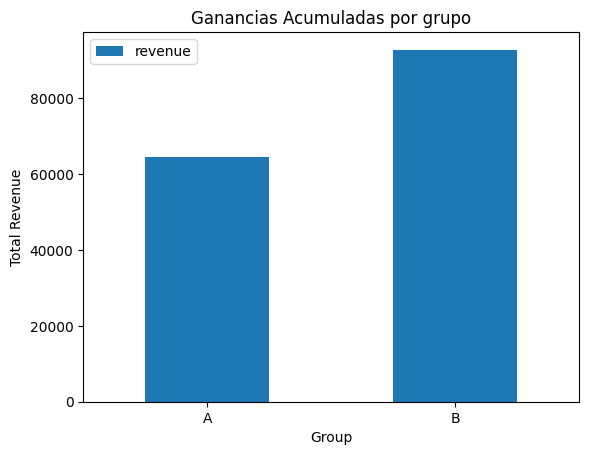

In [276]:
# 1. Representa gráficamente el ingreso acumulado por grupo. Haz conclusiones y conjeturas.

revenue_per_group = orders.groupby('group').agg({'revenue':'sum'})

print(orders.info())
print(orders)
print(revenue_per_group)

revenue_per_group.plot(kind='bar', title='Ganancias Acumuladas por grupo', rot=0, xlabel='Group', ylabel='Total Revenue')

Evidentemente el grupo B cuenta con mas ingresos que el grupo A en un 15% más.

       transactionId
group               
A                557
B                640


<Axes: title={'center': 'Tamaño del Pedido promedio por grupo'}, xlabel='Group', ylabel='Total Trasanctions'>

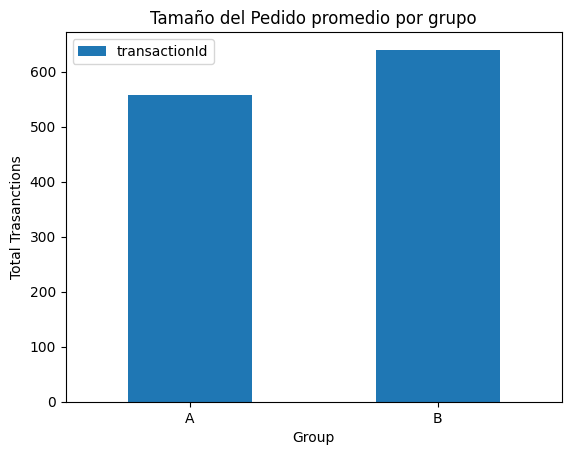

In [277]:
# 2.Representa gráficamente el tamaño de pedido promedio acumulado por grupo. Haz conclusiones y conjeturas.

size_transaction_per_group = orders.groupby('group').agg({'transactionId':'nunique'})
print(size_transaction_per_group)

size_transaction_per_group.plot(kind='bar', title='Tamaño del Pedido promedio por grupo', rot=0, xlabel='Group', ylabel='Total Trasanctions')


El grupo B cuenta con mas pedidos que el grupo A en un 7% más.

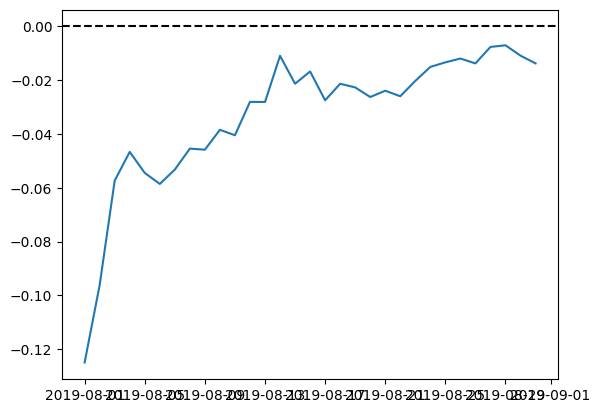

In [278]:
# 3.Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A. Haz conclusiones y conjeturas.

orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visits['date'] = visits['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

datesGroups = orders[['date','group']].drop_duplicates()

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date':'max','group':'max','transactionId':pd.Series.nunique, 'visitorId':pd.Series.nunique,'revenue':'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({'date':'max','group':'max','visits':'sum'}), axis=1).sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date','group'], right_on=['date','group'])
cumulativeData.columns = ['date','group','cumulativeTransaction','cumulativeVisitTransaction','cumulativeRevenue','cumulativeVisits']

cumulativeTransactionA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeTransactionB = cumulativeData[cumulativeData['group'] == 'B']

mergecumulativeTransaction = cumulativeTransactionA.merge(cumulativeTransactionB, left_on='date', right_on='date', how='left', suffixes=['A','B'])

plt.plot(mergecumulativeTransaction['date'], (mergecumulativeTransaction['cumulativeTransactionB'] / mergecumulativeTransaction['cumulativeVisitTransactionB']) / (mergecumulativeTransaction['cumulativeTransactionA'] / mergecumulativeTransaction['cumulativeVisitTransactionA'])-1)
plt.axhline(y=0, color='black', linestyle='--')

- El grupo B cuenta con mejores tasas de conversion y se incrementan al pasar de los días siendo muy notoria los primeros 5 días.

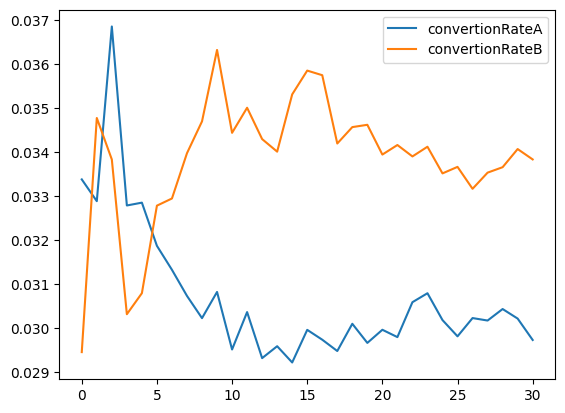

In [311]:
# 4.Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. Representa gráficamente las tasas de conversión diarias de los dos grupos y describe la diferencia. Saca conclusiones y haz conjeturas.

# Para obtener la tasa de conversion del grupo dividimos la suma de los pedidos entre la cantidad de visitas.

convertionRateA = mergecumulativeTransaction['cumulativeTransactionA'] / mergecumulativeTransaction['cumulativeVisitsA']
convertionRateB = mergecumulativeTransaction['cumulativeTransactionB'] / mergecumulativeTransaction['cumulativeVisitsB']

plt.plot(convertionRateA)
plt.plot(convertionRateB)
plt.legend(['convertionRateA','convertionRateB'])

La taza de converción del grupo B aumenta mientras que la del grupo A disminuye, aunque no durante toda la prueba. Ambos presentan picos de aumento antes de los 5 primeros días. Luego ambos grupos prensentan un notable descenso manteniuendose en el grupo A, sin embargo no es el caso para el grupo B el cual comienza a aumentar presentando variaciones a lo largo del tiempo. 



           date   visitorId  transactionId
0    2019-08-01     8300375              1
1    2019-08-01   134926050              1
2    2019-08-01   363280180              1
3    2019-08-01   381340408              1
4    2019-08-01   414545763              1
...         ...         ...            ...
1143 2019-08-31  3910723394              1
1144 2019-08-31  4076480073              1
1145 2019-08-31  4120364173              1
1146 2019-08-31  4216089391              1
1147 2019-08-31  4256040402              2

[1148 rows x 3 columns]


<Axes: title={'center': 'Número de pedidos por usuario'}, xlabel='Usuario ID', ylabel='Cantidad de pedidos'>

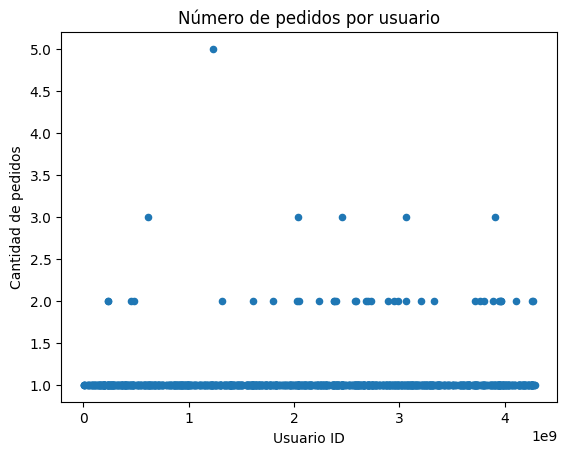

In [280]:
# 5.Traza un gráfico de dispersión del número de pedidos por usuario. Haz conclusiones y conjeturas.

transaction_per_user = orders.groupby(['date','visitorId']).agg({'transactionId':'nunique'}).reset_index()

print(transaction_per_user)

transaction_per_user.plot(title='Número de pedidos por usuario', x='visitorId', y='transactionId', kind='scatter', xlabel='Usuario ID', ylabel='Cantidad de pedidos')


La cantidad de pedidos oscilan mayoritariamente entre 1 y 2 pedidos por usuario siendo menos comunes mas de 2 pedidos.

In [281]:
# 6.Calcula los percentiles 95 y 99 del número de pedidos por usuario. Define el punto en el cual un punto de datos se convierte en una anomalía.

print(np.percentile(transaction_per_user['transactionId'],[95,99]))

[1. 2.]


- Podemos  considerar 2 pedidos como un comportamiento normal y el valor para filtrar las anomalías en valores de pedidos.
- Los usuarios con mas de dos pedidos pueden considerarse valores anómalos es decir 3, 4, o 5 pedidos.

           date  transactionId  revenue
0    2019-08-01        4919758     40.2
1    2019-08-01       52260954     20.2
2    2019-08-01      365058890     45.3
3    2019-08-01      477940151     15.8
4    2019-08-01      602399015      5.6
...         ...            ...      ...
1192 2019-08-31     3784371772    155.8
1193 2019-08-31     3845118557      5.5
1194 2019-08-31     4149581711     30.2
1195 2019-08-31     4180327962     55.4
1196 2019-08-31     4262851755     10.8

[1197 rows x 3 columns]


<Axes: title={'center': 'Precio de pedidos por usuario'}, xlabel='Transaction ID', ylabel='Revenue'>

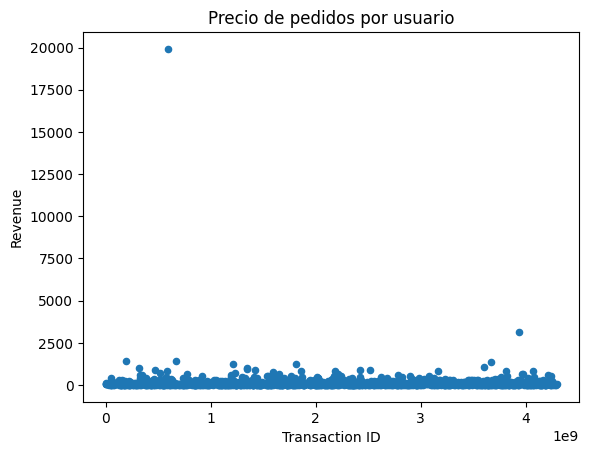

In [282]:
#7.Traza un gráfico de dispersión de los precios de los pedidos. Haz conclusiones y conjeturas.

revenue_per_transaction =  orders.groupby(['date','transactionId']).agg({'revenue':'sum'}).reset_index()
print(revenue_per_transaction)

revenue_per_transaction.plot(title='Precio de pedidos por usuario', x='transactionId', y='revenue', kind='scatter', xlabel='Transaction ID', ylabel='Revenue')



La mayoría de los pedios son menores a 2500$, sólo existen dos pedidos mayores a 2500$.

In [283]:
# 8.Calcula los percentiles 95 y 99 de los precios de los pedidos. Define el punto en el cual un punto de datos se convierte en una anomalía.
print(np.percentile(revenue_per_transaction['revenue'],[95,99]))

[435.54  900.904]


- Podemos considerar los valores anómalos los pedidos que excedan los 400$, ya que representan sólo el 5% de los pedidos.

In [285]:
# 9. Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.

transactionByuserA = orders[orders['group'] == 'A'].groupby('visitorId', as_index=False).agg({'transactionId':pd.Series.nunique})
transactionByuserA.columns = ['visitorId','transaction']
transactionByuserB = orders[orders['group'] == 'B'].groupby('visitorId', as_index=False).agg({'transactionId':pd.Series.nunique})
transactionByuserB.columns = ['visitorId','transaction']

sampleA = pd.concat([transactionByuserA['transaction'],pd.Series(0, index= np.arange(visits[visits['group'] == 'A']['visits'].sum() - len(transactionByuserA['transaction'])), name='transaction')], axis=0)
sampleB = pd.concat([transactionByuserB['transaction'],pd.Series(0, index= np.arange(visits[visits['group'] == 'B']['visits'].sum() - len(transactionByuserB['transaction'])), name='transaction')], axis=0)



print('Tasa de conversión A: ',sampleA.mean())
print('Tasa de conversión B: ',sampleB.mean())

print("{0:.3f}".format(stats.mannwhitneyu(sampleA,sampleB)[1]))
print("{0:.3f}".format(sampleB.mean() / sampleA.mean()-1))



Tasa de conversión A:  0.029728864218616567
Tasa de conversión B:  0.033833791499259885
0.017
0.138


- Según los datos sin procesar, si existe diferencia entre los grupos A y B en cuanto a la conversión se refiere. El valor de p es menor que 0.05, debido a esto rechazamos la hipótesis nula y podemos decir que hay una diferencia estadísticamente significativa entre la conversión entre los grupos por lo cual hubo una afectación en los grupos.
- También podemos decir que existe una ganacia relativa del grupo B con respecto al grupo A de 13.8%.

In [289]:
# 10.Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.

print("{0:.3f}".format(stats.mannwhitneyu(orders[orders['group'] == 'A']['revenue'], orders[orders['group'] == 'B']['revenue'])[1]))
print("{0:.3f}".format(orders[orders['group'] == 'B']['revenue'].mean() / orders[orders['group'] == 'A']['revenue'].mean()-1))

0.692
0.252


- El tamaño promedio de los pedidos difiere entre los grupos debido a que no hay motivo para rechazar la hipótesis nula y el tamaño promedio para el grupo B es mucho mas grande que para el grupo A.

In [301]:
# 11.Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.

userswithManyOrders = pd.concat([transactionByuserA[transactionByuserA['transaction'] > 2]['visitorId'], transactionByuserB[transactionByuserB['transaction'] > 2]['visitorId']], axis=0)

userswithExpensiveOrders = orders[orders['revenue'] > 400]['visitorId']

abnormalUsers = pd.concat([userswithManyOrders, userswithExpensiveOrders], axis=0).drop_duplicates().sort_values()
print(abnormalUsers.shape)

sampleAfiltered = pd.concat([transactionByuserA[np.logical_not(transactionByuserA['visitorId'].isin(abnormalUsers))]['transaction'], pd.Series(0, index=np.arange(visits[visits['group'] == 'A']['visits'].sum() - len(transactionByuserA['transaction'])), name='transaction')], axis=0)
sampleBfiltered = pd.concat([transactionByuserB[np.logical_not(transactionByuserB['visitorId'].isin(abnormalUsers))]['transaction'], pd.Series(0, index=np.arange(visits[visits['group'] == 'B']['visits'].sum() - len(transactionByuserB['transaction'])), name='transaction')], axis=0)


print("{0:.3f}".format(stats.mannwhitneyu(sampleAfiltered, sampleBfiltered)[1]))
print("{0:.3f}".format(sampleBfiltered.mean() / sampleAfiltered.mean() - 1))

(85,)
0.021
0.162


- En total existen 85 usuarios anómalos.
- Los resultados de la conversión casi no cambiaron aunque el porcentaje aumento 2.4% de el grupo B en relación al grupo A.

In [309]:
# 12. Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.

print("{0:.3f}".format(stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A', np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'], orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'],)[1]))

print("{0:.3f}".format(orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() / orders[np.logical_and(orders['group'] == 'A', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.596
-0.053


El valor p aumento pero la diferencia entre los grupos disminuyo notablemente de 25% a 5%.

13.	Toma una decisión basada en los resultados de la prueba. Las decisiones posibles son: 1. Parar la prueba, considerar a uno de los grupos como líder. 2. Parar la prueba, concluir que no hay diferencia entre los grupos. 3. Continuar la prueba.



- Los datos sin procesar y los datos filtrados no reflejan diferencia estadística en la conversión entre los grupos.
- Los datos sin procesar y los datos filtrados reflejaron una diferencia entre los segmentos en el tamaño promedio del pedido.
- El gráfico que muestra la diferencia de conversión entre los grupos nos dice que los resultados del grupo B son mejores significativamente y se mantienen en el tiempo.

Podemos concluir que __1. Podemos parar la prueba y considerar al grupo B como líder.__